In [58]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt

%matplotlib inline

1 (+1). Загрузить titanic.csv. Нарисовать диаграммы (гистограммы/круговые/...), по которым можно будет сравнить 1) вероятность выжить для мужчин и женщин, 2) вероятность выжить для пассажиров разных социально-экономических классов (Pclass), 3) стоимость билета в зависимости от социально-экономического класса. Написать, что вам удалось узнать из этих диаграмм (например, «для пассажира 1 класса вероятность выжить составила XX% и оказалась выше, чем у пассажира 2 класса (YY%)»; чем больше информации вы сможете извлечь из диаграмм, тем лучше)

In [4]:
titan = pd.read_csv('titanic.csv', index_col='PassengerId')

In [80]:
titan.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


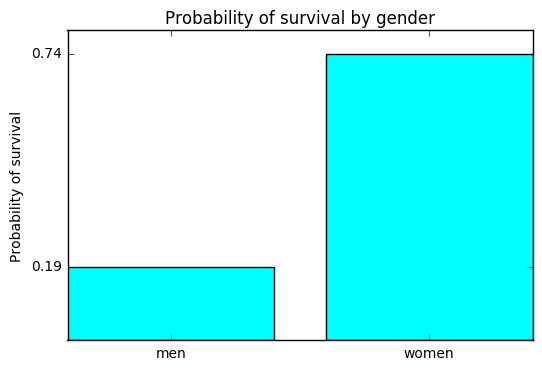

In [143]:
# вероятность выжить для мужчин и женщин
men = titan.loc[titan['Sex'] == 'male']
women = titan.loc[titan['Sex'] == 'female']
men_survived = sum(men['Survived'])
women_survived = sum(women['Survived'])

labels = ('men', 'women')
index = np.arange(len(labels))
numbers = [round(men_survived/len(men), 2), round(women_survived/len(women), 2)]
plt.bar(index, numbers, align='center', color='cyan')
plt.xticks(index, labels)
plt.yticks(numbers)
plt.ylabel('Probability of survival')
plt.title('Probability of survival by gender')
plt.show()

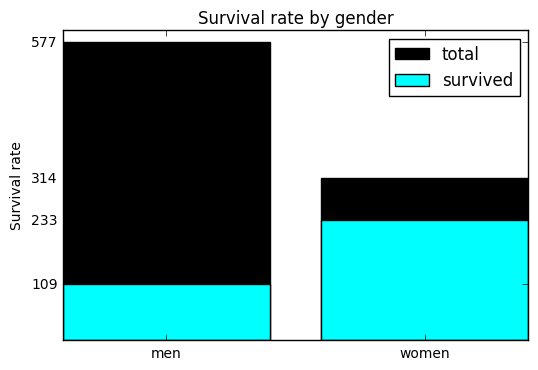

In [145]:
# теперь посмотрим, сколько их там было всего (не там, а в датасете)
N = 2
survived = [men_survived, women_survived]
total = [len(men), len(women)]
ind = np.arange(N)

p1 = plt.bar(ind, total, align='center', color='black')
p2 = plt.bar(ind, survived, align='center', color='cyan')


plt.ylabel('Survival rate')
plt.title('Survival rate by gender')
plt.xticks(ind, labels)
plt.yticks(survived+total)
plt.legend((p1[0], p2[0]), ('total', 'survived'))
plt.show()

Видимо, спасали в первую очередь женщин: для них вероятность выжить оказалась равна 74%, что почти в 4 раза выше, чем у мужчин (19%). Хотя женщин в принципе было меньше почти в два раза, но и абсолютное количество выживших среди них в два раза выше, чем среди мужчин.

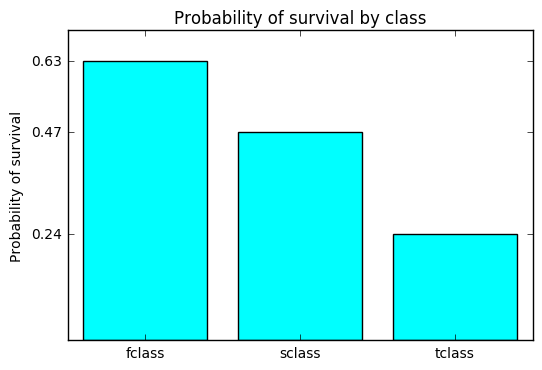

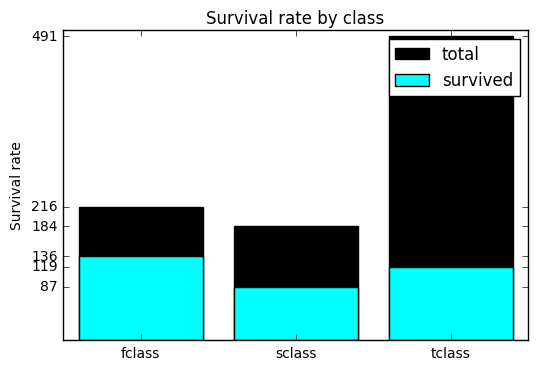

In [148]:
# по классу
labels = ['fclass', 'sclass', 'tclass']
numbers = []
for pclass in labels:
    vars()[pclass] = titan.loc[titan['Pclass'] == labels.index(pclass)+1]
    numbers.append(sum(vars()[pclass]['Survived'])/len(vars()[pclass]))

index = np.arange(len(labels))
numbers = list(map(lambda x: round(x, 2), numbers))
plt.bar(index, numbers, align='center', color='cyan')
plt.xticks(index, labels)
plt.yticks(numbers)
plt.ylabel('Probability of survival')
plt.title('Probability of survival by class')
plt.show()

# ну и количество тоже можно посмотреть
survived = []
total = []
for pclass in labels:
    total.append(len(vars()[pclass]))
    survived.append(sum(vars()[pclass]['Survived']))
index = np.arange(len(total))

p1 = plt.bar(index, total, align='center', color='black')
p2 = plt.bar(index, survived, align='center', color='cyan')

plt.ylabel('Survival rate')
plt.title('Survival rate by class')
plt.xticks(index, labels)
plt.yticks(survived+total)
plt.legend((p1[0], p2[0]), ('total', 'survived'))
plt.show()

Итак, видим, что вероятность выжить повышается с увеличением класса: пассажиры первого класса выживали с вероятностью 63%, второго - с вероятностью 47%, а третьего - всего 24%. Однако второй график показывает, что вероятный приоритет более высоких классов при спасении играл не на стороне третьего класса ещё и потому, что третьего класса было очень много(491, что почти в 2,5 раза больше, чем того же первого класса (216)). Тем не менее абсолютное количество спасшихся по классам примерно одинаковое (136 для первого класса, 87 для второго, 119 для первого).

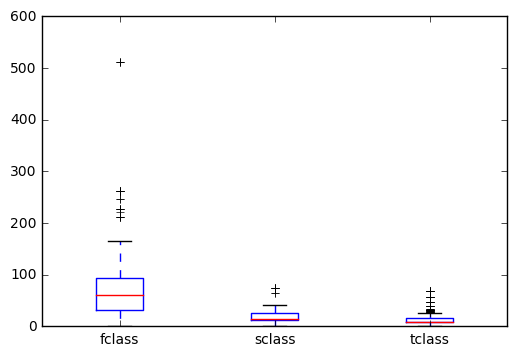

In [162]:
# стоимость билета в зависимости от социально-экономического класса
fares = []
for pclass in labels:
    fares.append(np.array(vars()[pclass]['Fare']))

plt.figure()
plt.boxplot(fares, labels = labels)
plt.show()

Понятно, что чем выше класс, тем выше стоимость, но кто-то купил себе уж очень дорогую каюту.
Стоит ли говорить, что это мне не нравится.

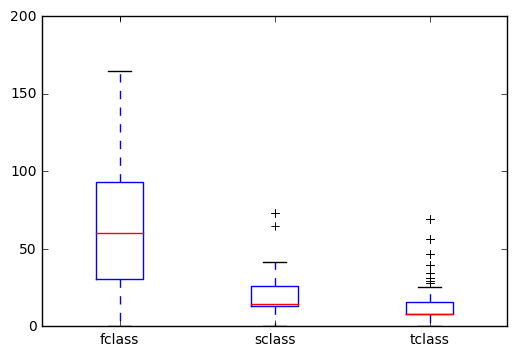

In [164]:
fares[0] = np.clip(fares[0], 0, 200)
plt.figure()
plt.boxplot(fares, labels = labels)
plt.show()

# вставить описание после того как подпишешь y

2 (+2). А теперь нарисуем два предиктора на одной диаграмме. Нарисовать гистограмму, описывающую среднюю вероятность выжить в зависимости от пола и соц. статуса. Например, это может быть гистограмма с тремя группами столбцов (разделение по соц.статусу), в которой высота столбца соответствует среднему числу выживших, а цвет столбца обозначает пол пассажиров. Снова интерпретировать результаты (Например, какова вероятность выжить женщине из первого класса?). Записать любые два утверждения в виде формул (нужно вспомнить, что такое совместная и/или условная вероятность).

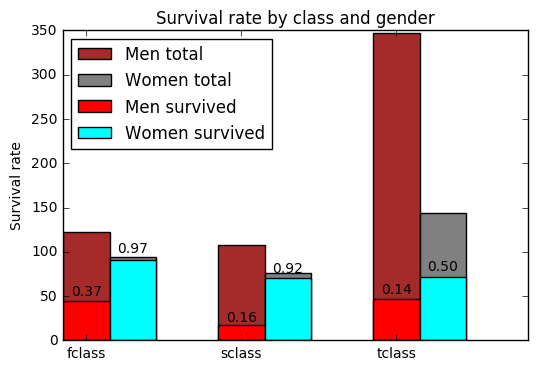

In [211]:
men_class = []
women_class = []
men_class_survived = []
women_class_survived = []
for pclass in labels:
    men_class.append(vars()[pclass].loc[vars()[pclass]['Sex'] == 'male'])
    women_class.append(vars()[pclass].loc[vars()[pclass]['Sex'] == 'female'])
# достанем все нужные числа и превратим 
men_class_survived = list(map(lambda x: sum(x['Survived']), men_class))
women_class_survived = list(map(lambda x: sum(x['Survived']), women_class))
men_class = list(map(len, men_class))
women_class = list(map(len, women_class))

index = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(index, men_class, width, color='brown')
rects10 = ax.bar(index, men_class_survived, width, color='r')

rects2 = ax.bar(index + width, women_class, width, color='grey')
rects20 = ax.bar(index + width, women_class_survived, width, color='cyan')

# add some text for labels, title and axes ticks
ax.set_ylabel('Survival rate')
ax.set_title('Survival rate by class and gender')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(labels)

ax.legend((rects1[0], rects2[0], rects10[0], rects20[0]), ('Men total', 'Women total', 'Men survived', 'Women survived'),\
         loc=2)


def autolabel(rects, rects_total):
    """
    show the probability above each survived bar
    """
    for i in range(len(rects)):
        height = rects[i].get_height()
        height_total = rects_total[i].get_height()
        ax.text(rects[i].get_x() + rects[i].get_width()/2., 1.05*height,
                '{:.2f}'.format(height/height_total),
                ha='center', va='bottom')

autolabel(rects10, rects1)
autolabel(rects20, rects2)

Получается, что абсолютное число спасшихся женщин примерно одинаковое по классам, хотя вероятность выжить у женщины из третьего класса в два раза меньше, чем у женщины из первого. В общем у женщины из первого класса самая высокая вероятность выжить - 97%, то есть почти все из этой группы выжили; самая низкая - у мужчины из третьего, что согласуется с предыдущими графиками/выводами. Причём пол более важен: вероятность выжить для женщины из третьего класса на треть больше, чем для мужчины из первого (50% и 37% соответственно).

3 (+2). Почистите данные так, как считаете нужным (не забывайте про коварную переменную Sex; постарайтесь не удалять строки). Extra: сможете ли вы использовать не 4 столбца, а больше? Например, кажется, что если ребёнок ехал с братом/сестрой, то их не разлучат, а посадят вместе в шлюпку, и они выживут...

In [7]:
# заменим female и male на 0 и 1 соответственно (по алфавиту)
titan['Sex'] = pd.get_dummies(titan['Sex'], drop_first=True).astype(int)

# удалим ненужные столбцы
del titan['Name']
del titan['Ticket']
del titan['Cabin']
del titan['Embarked']

In [22]:
titan.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
6,0,3,1,NaN,0,0,8.4583


In [43]:
# убираем NaN
for i in titan:
    mu = np.mean(titan[i])
    titan[i] = titan[i].fillna(mu)
titan.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.000000,1,0,7.2500
2,1,1,0,38.000000,1,0,71.2833
3,1,3,0,26.000000,0,0,7.9250
4,1,1,0,35.000000,1,0,53.1000
5,0,3,1,35.000000,0,0,8.0500
6,0,3,1,29.699118,0,0,8.4583


4 (+2). Разделить данные на обучающую и проверочную выборки (или использовать кросс-валидацию). Будем строить дерево решений. Нужно выбрать параметр модели, который, на ваш взгляд, может повлиять на результат, и выбрать для него возможные значения. Прокомментировать свой выбор. Изменяя в цикле значения параметра, посчитать для каждого случая точноть, полноту, F-меру (может быть, другие метрики?). Изобразить результаты на диаграмме/-ах. Интерпретировать результаты. Нарисовать лучшее дерево.

Extra: варьировать не в цикле, а использовать grid search.
Super–duper-Extra: построить ROC-кривую и написать свою интерпретацию того, что эта диаграмма говорит о модели.

In [50]:
y = titan['Survived']
del titan['Survived']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(titan, y)

In [51]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_test.describe()

(668, 6) (223, 6) (668,) (223,)


,Pclass,Sex,Age,SibSp,Parch,Fare
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2.309417,0.695067,30.326211,0.452915,0.358744,35.830322
std,0.848024,0.461415,12.579930,0.961548,0.774889,63.554312
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000
25%,1.500000,0.000000,24.000000,0.000000,0.000000,7.895800
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.400000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,29.062500
max,3.000000,1.000000,70.500000,8.000000,5.000000,512.329200


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
tr = DecisionTreeClassifier(random_state=7)

In [66]:
from sklearn.grid_search import GridSearchCV
parameters = {'min_samples_split': list(range(2, 10))}
clf = GridSearchCV(tr, parameters)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [69]:
print(clf.best_score_)
print("Best parameters set:")
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t{}: {}".format(param_name, best_parameters[param_name]))

# нужны метрики, да без метрик мы никуда

0.535928143713
Best parameters set:
	min_samples_split: 2


In [70]:
# pr = tp/tp+fp    10/10+2+8
# r = tp/tp+fn    10/10+1+2
# f1 = (2*pr*r)/(pr+r)
# accuracy = sum(diag)/sum_total

In [72]:
importances = pd.Series(clf.feature_importances_, index=x_labels)
print(importances)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

5 (+2). Проделать аналогичные операции для модели Random Forest. Сравнить результаты.